In [21]:
import numpy as np
import pandas as pd
import geopandas as geo
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


csv = pd.read_csv("data.csv")

fishFryData = pd.DataFrame(csv)
validatedFrame = fishFryData[["validated"]]
neighborhood = geo.read_file("Maps/Neighborhoods_.shp")

validatedFrame.head()

,validated
0,False
1,True
2,True
3,True
4,True


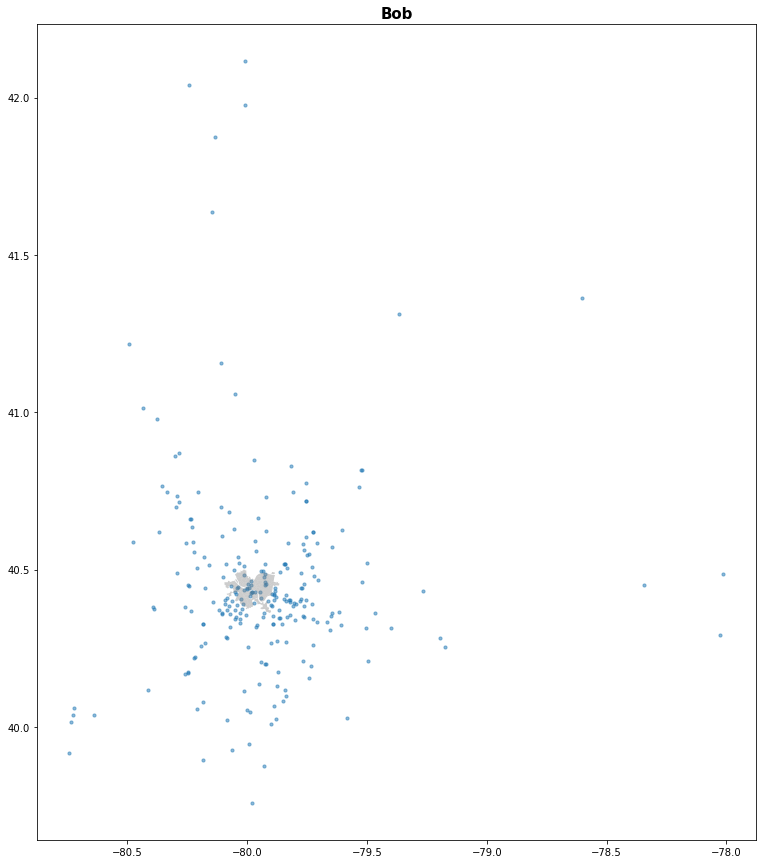

In [22]:
fig, ax = plt.subplots(figsize=(15,15))

crs = {"init":"espc:4326"}
geometry = [Point(xy) for xy in zip(fishFryData["longitude"], fishFryData["latitude"])]

geo_df = geo.GeoDataFrame(fishFryData, geometry = geometry)

geo_df.plot(ax=ax,alpha=0.5, legend=True,markersize=10,)
neighborhood.plot(ax=ax, alpha=0.4,color='grey')

plt.title("Bob", fontsize=15,fontweight="bold")

plt.show()

<AxesSubplot:>

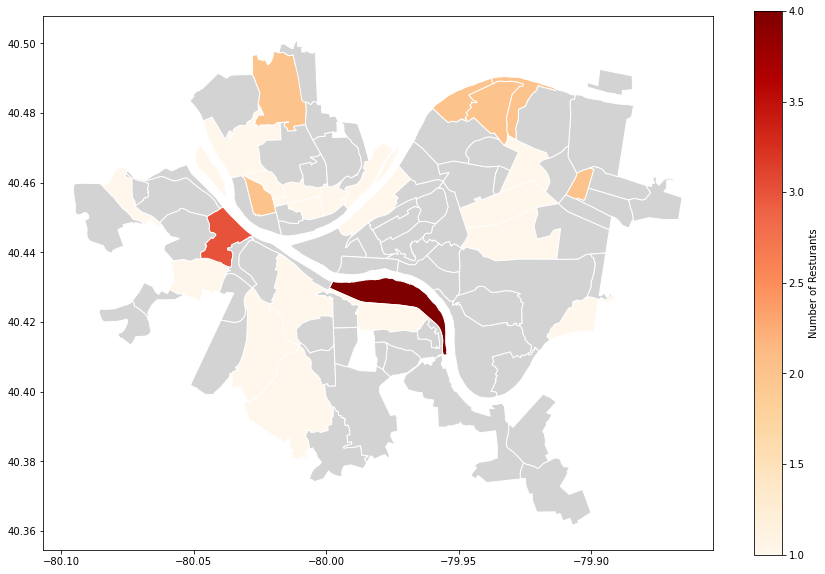

In [25]:
communityFishFryCount = {}

neighborhoodData = list("")
with open("NeighborhoodData.txt") as file:
    neighborhoodData = file.readlines()
    
for i in range(len(neighborhoodData)):
    neighborhoodData[i] = neighborhoodData[i].replace('\n', '')
    neighborhoodData[i] = neighborhoodData[i].replace(',', '')


for community in neighborhoodData:
    if community in communityFishFryCount:
        communityFishFryCount[community] += 1
    else:
        communityFishFryCount[community] = 1

df = pd.DataFrame({"neighborhoods":communityFishFryCount.keys(), "count":communityFishFryCount.values()})
city = geo.read_file("Maps/Neighborhoods_.shp")
m = city.merge(df, how="left", left_on="hood", right_on="neighborhoods")

m.plot(column='count', 
       cmap='OrRd', 
       edgecolor="white", 
       legend=True, 
       figsize=(15, 10), 
       missing_kwds={"color": "lightgrey"},
       legend_kwds={'label': "Number of Resturants"})

In [13]:
##geolocator = Nominatim(user_agent="example app")
##
##print("Starting")
##for index, row in fishFryData.iterrows():
##    lat = row["latitude"]
##    long = row["longitude"]
##    coordinates = str(lat) + ", " + str(long)
##    
##    location = geolocator.reverse(coordinates)
##    
##    try:
##        city = location.raw['address']['city']
##        if (city != "Pittsburgh"):
##            continue
##    except:
##        continue
##    
##    
##    try:
##        n = location.raw['address']['neighbourhood']
##        print(n)
##    except: continue
##
##print("Finished")

<AxesSubplot:>

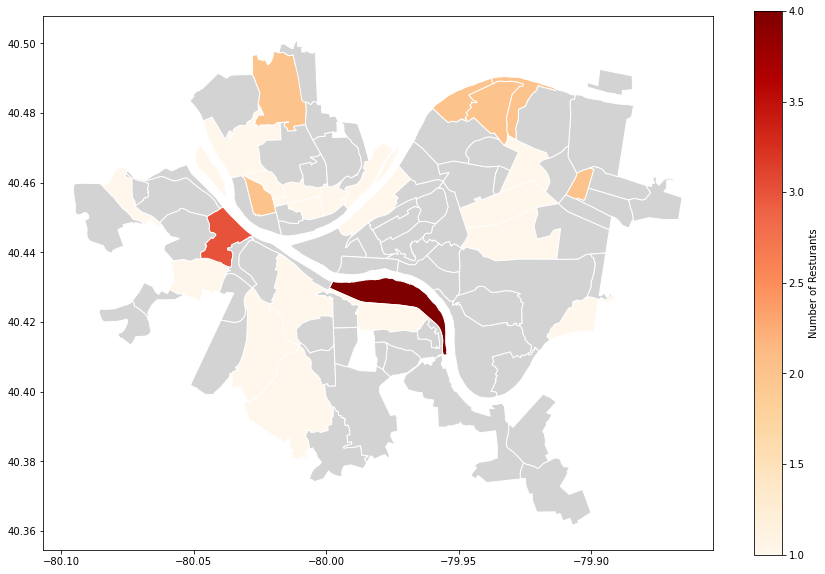

In [24]:
m.plot(column='count', 
       cmap='OrRd', 
       edgecolor="white", 
       legend=True, 
       figsize=(15, 10), 
       missing_kwds={"color": "lightgrey"},
       legend_kwds={'label': "Number of Resturants"})